# R Exam - Gema Castillo García

Gross domestic product (GDP) is a monetary measure of the market value of all the final goods and services produced in a specific time period. In spanish is called the PIB (Producto Interno Bruto).
The Human Development Index (HDI) is a statistic composite index of life expectancy, education (Literacy Rate, Gross Enrollment Ratio at different levels and Net Attendance Ratio), and per capita income indicators, which are used to rank countries into four tiers of human development.

Several online websites (among which the spanish wikipedia https://es.wikipedia.org/wiki/%C3%8Dndice_de_desarrollo_humano), have suggested that GDP and HDI are strongly correlated, meaning that the better the country's economy the better the human development of their citizens. Let's try to plot the data for Spain (from 2007) and analyze it.

- Load the files GDP.csv and HDI.csv using read.csv()

In [1]:
GDP <- read.csv("GDP.csv")
HDI <- read.csv("HDI.csv")

- Analyze the file that you have just loaded with head()  and str()

In [2]:
head(GDP)
str(GDP) #the data frame GDP has 50 rows and 3 columns (Province, GDP, and CCAA)

head(HDI)
str(HDI) #the data frame HDI has 50 rows and 2 columns (Province and HDI)

#we can bind the two data frames by Province (see next exercise)

,Province,GDP.per.capita,CCAA
,<chr>,<dbl>,<chr>
1,Almería,20.873,Andalucía y Extremadura
2,Cádiz,18.029,Andalucía y Extremadura
3,Córdoba,17.292,Andalucía y Extremadura
4,Granada,17.167,Andalucía y Extremadura
5,Huelva,18.207,Andalucía y Extremadura
6,Jaén,16.433,Andalucía y Extremadura


'data.frame':	50 obs. of  3 variables:
 $ Province      : chr  "Almería" "Cádiz" "Córdoba" "Granada" ...
 $ GDP.per.capita: num  20.9 18 17.3 17.2 18.2 ...
 $ CCAA          : chr  "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" ...


,Province,HDI
,<chr>,<dbl>
1,Cádiz,0.913
2,Almería,0.915
3,Jaén,0.915
4,Huelva,0.917
5,Badajoz,0.919
6,Córdoba,0.920


'data.frame':	50 obs. of  2 variables:
 $ Province: chr  "Cádiz" "Almería" "Jaén" "Huelva" ...
 $ HDI     : num  0.913 0.915 0.915 0.917 0.919 0.92 0.92 0.921 0.923 0.924 ...


- Glue together the two data frames by columns (one next to the other) using cbind(). We want the province to match on the same rows, so you need first to sort the rows of the two data frames by Province, using order() 

In [3]:
#sorting the data frames by Province with 'order' and binding them by columns with 'cbind' -> creating a new data frame
cbind(GDP[order(GDP$Province), ], HDI[order(HDI$Province), ]) -> binded_data

- The new data frame will contain two columns names "Province". Remove one of the columns

In [4]:
binded_data <- subset (binded_data, select = -Province) #removing the first column called Province

- Check that everything is fine with head() and tail(). The final data frame should have 4 columns: Province,	GDP.per.capita,	CCAA and HDI. **With each province matching its CCAA**.

In [5]:
head(binded_data)
tail(binded_data)

,GDP.per.capita,CCAA,Province,HDI
,<dbl>,<chr>,<chr>,<dbl>
48,36.055,País Vasco Navarra y Rioja,Álava,0.990
26,17.864,Castilla-La Mancha,Albacete,0.933
34,19.201,Comunitat Valenciana y Murcia,Alicante,0.930
1,20.873,Andalucía y Extremadura,Almería,0.915
12,21.634,Asturias y Cantabria,Asturias,0.956
16,18.382,Castilla y León,Ávila,0.952


,GDP.per.capita,CCAA,Province,HDI
,<dbl>,<chr>,<chr>,<dbl>
29,19.251,Castilla-La Mancha,Toledo,0.933
36,22.538,Comunitat Valenciana y Murcia,Valencia,0.946
24,23.947,Castilla y León,Valladolid,0.978
50,27.705,País Vasco Navarra y Rioja,Vizcaya,0.988
25,17.952,Castilla y León,Zamora,0.959
11,26.082,Aragon,Zaragoza,0.968


- Create scatterplot of text using geom_point(). Plot the GDP.per.capita (x-axis) against the HDI (y-axis). Color the points by CCAA (use color=CCAA inside the aes() function of geom_point).

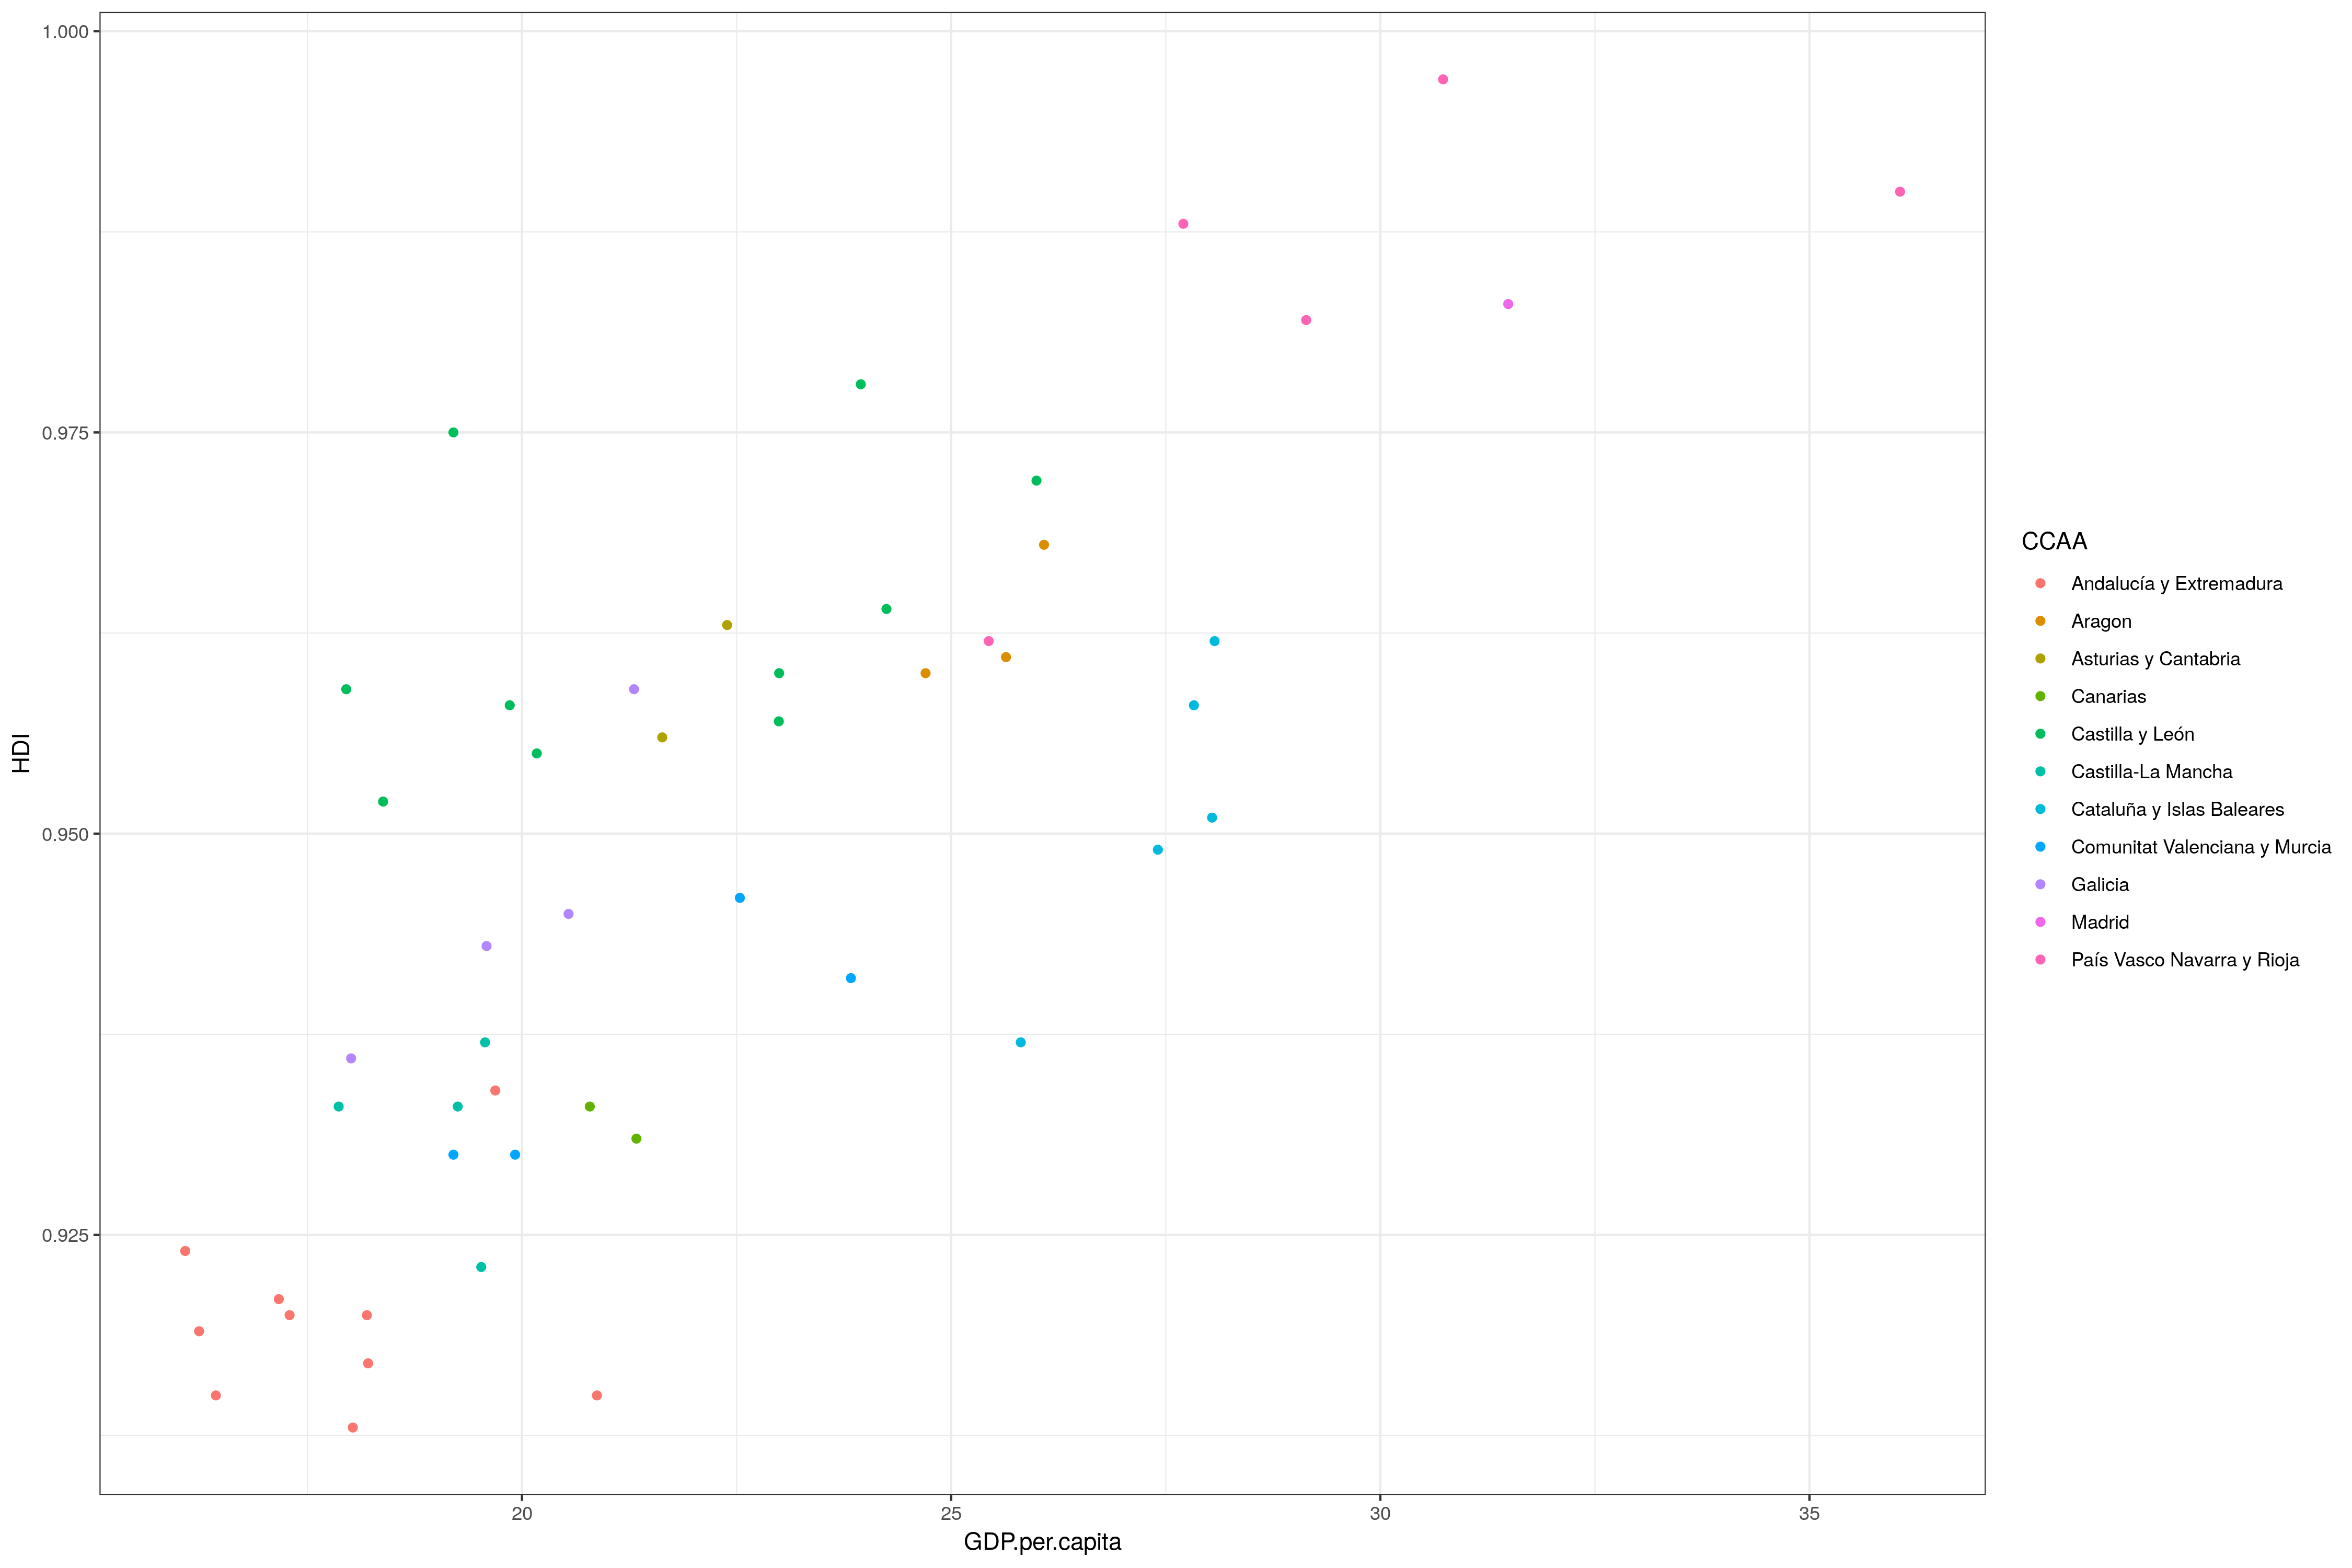

In [6]:
library(ggplot2)

#allowing the plots to be bigger
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 300)
#changing default theme to black and white
theme_set(theme_bw())

#creating the scatterplot 
ggplot(binded_data) + geom_point(aes(x = GDP.per.capita, y = HDI, color=CCAA))

- Do the same but use geom_text(). Specify as labels the names of the provinces, using aes(label=Province) inside geom_text. Color by CCAA. Also specify check_overlap=T so that the names do not overlap, if you want.

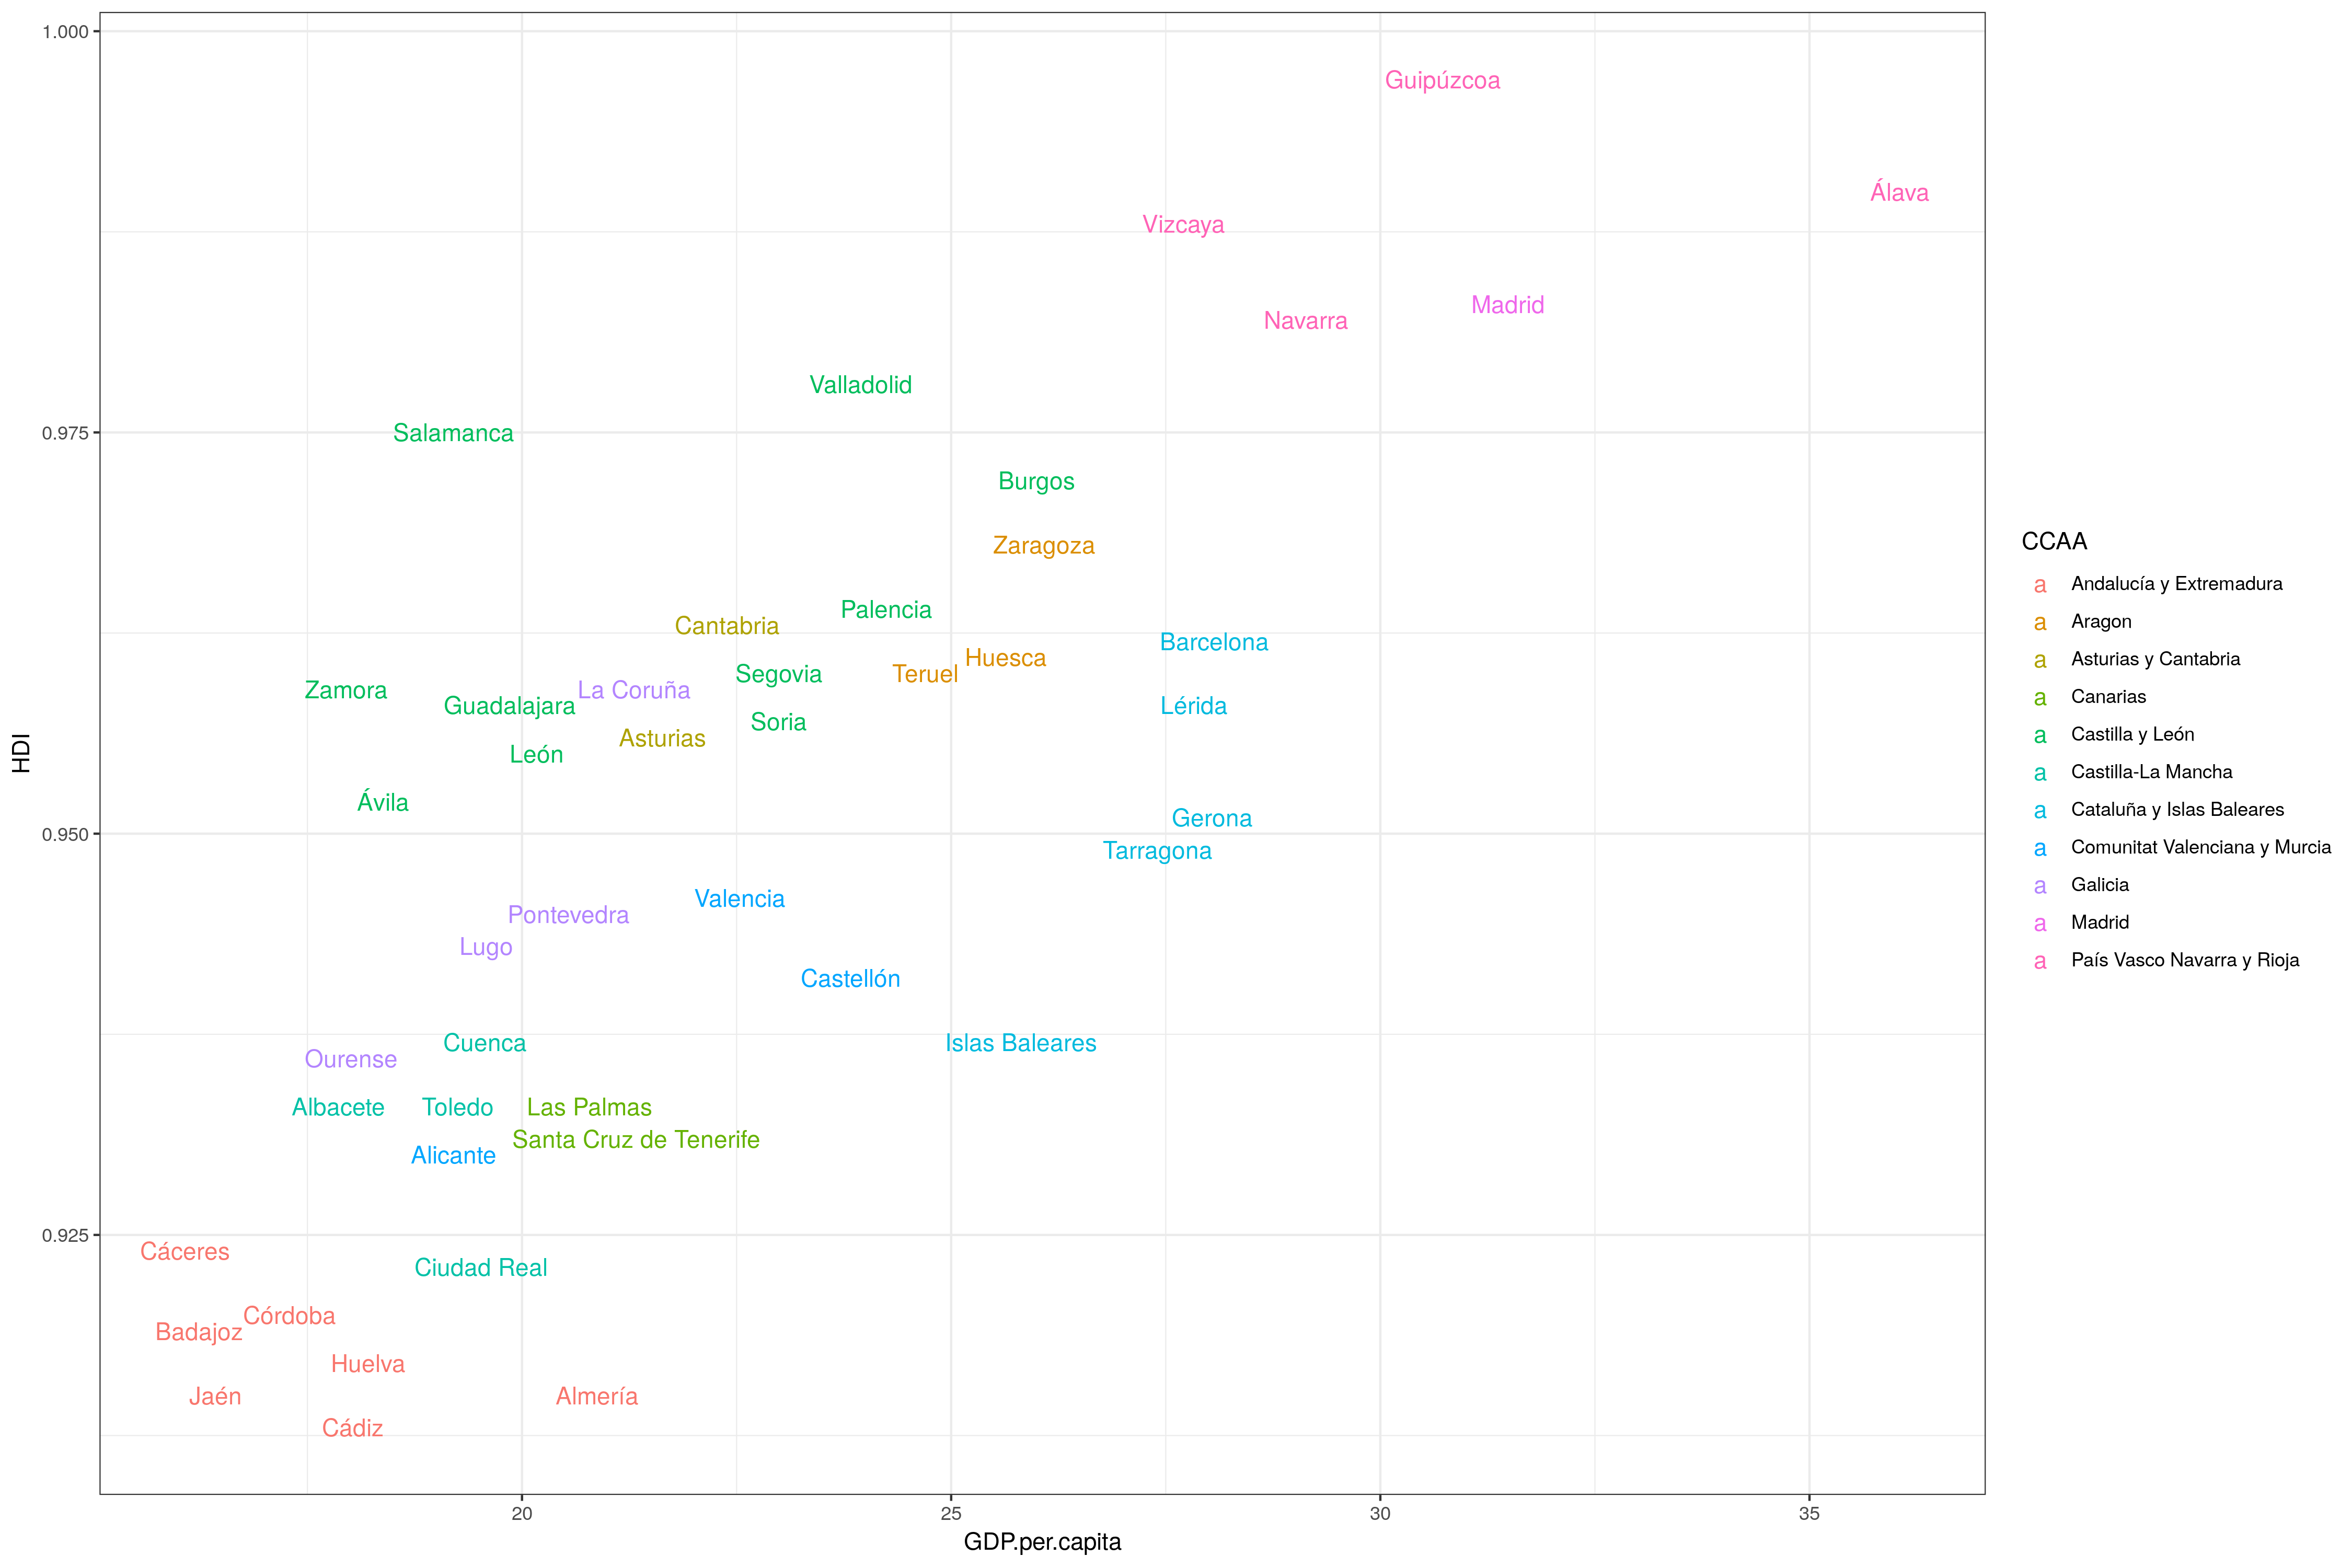

In [7]:
ggplot(binded_data) + geom_text(aes(x = GDP.per.capita, y = HDI, color=CCAA, label=Province), check_overlap=T)

- Calculate the mean and standard deviation of GDP and HDI, by CCAA, using aggregate ().

In [8]:
#calculating the mean and standard deviation (sd) of GDP per capita by CCAA
aggregate(x = binded_data$GDP.per.capita, by = list(binded_data$CCAA), FUN = mean) -> GDP_means
aggregate(x = binded_data$GDP.per.capita, by = list(binded_data$CCAA), FUN = sd) -> GDP_sd
#showing the mean and sd of GDP per capita by CCAA
GDP_means
GDP_sd

#calculating the mean and sd of HDI by CCAA
aggregate(x = binded_data$HDI, by = list(binded_data$CCAA), FUN = mean) -> HDI_means
aggregate(x = binded_data$HDI, by = list(binded_data$CCAA), FUN = sd) -> HDI_sd
#showing the mean and sd of HDI per capita by CCAA
HDI_means
HDI_sd

Group.1,x
<chr>,<dbl>
Andalucía y Extremadura,17.81970
Aragon,25.47433
Asturias y Cantabria,22.01200
Canarias,21.06150
Castilla y León,21.57390
Castilla-La Mancha,19.05250
Cataluña y Islas Baleares,27.43120
Comunitat Valenciana y Murcia,21.37275
Galicia,19.86075


Group.1,x
<chr>,<dbl>
Andalucía y Extremadura,1.5391112
Aragon,0.7045824
Asturias y Cantabria,0.5345727
Canarias,0.3839590
Castilla y León,2.7926986
Castilla-La Mancha,0.8047768
Cataluña y Islas Baleares,0.9434594
Comunitat Valenciana y Murcia,2.1781260
Galicia,1.4205488


Group.1,x
<chr>,<dbl>
Andalucía y Extremadura,0.91980
Aragon,0.96300
Asturias y Cantabria,0.95950
Canarias,0.93200
Castilla y León,0.96300
Castilla-La Mancha,0.93150
Cataluña y Islas Baleares,0.95140
Comunitat Valenciana y Murcia,0.93675
Galicia,0.94575


Group.1,x
<chr>,<dbl>
Andalucía y Extremadura,0.005977736
Aragon,0.004358899
Asturias y Cantabria,0.004949747
Canarias,0.001414214
Castilla y León,0.008956686
Castilla-La Mancha,0.005972158
Cataluña y Islas Baleares,0.009607289
Comunitat Valenciana y Murcia,0.008057088
Galicia,0.009639329


- Create a new data frame where you put each CCAA with the corresponding mean GDP, mean HDI, stdev GDP and stdev HDI

In [9]:
data.frame(CCAA = GDP_means$Group.1, GDP_mean = GDP_means$x, HDI_mean = HDI_means$x, GDP_sd = GDP_sd$x, HDI_sd = HDI_sd$x) -> CCAA
CCAA #new data frame with means and sd of GDP/HDI by CCAA

CCAA,GDP_mean,HDI_mean,GDP_sd,HDI_sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980,1.5391112,0.005977736
Aragon,25.47433,0.96300,0.7045824,0.004358899
Asturias y Cantabria,22.01200,0.95950,0.5345727,0.004949747
Canarias,21.06150,0.93200,0.3839590,0.001414214
Castilla y León,21.57390,0.96300,2.7926986,0.008956686
Castilla-La Mancha,19.05250,0.93150,0.8047768,0.005972158
Cataluña y Islas Baleares,27.43120,0.95140,0.9434594,0.009607289
Comunitat Valenciana y Murcia,21.37275,0.93675,2.1781260,0.008057088
Galicia,19.86075,0.94575,1.4205488,0.009639329


- Madrid is a single province CCAA, so you will see that its standar deviation is NA. Replace those NAs with zeros, using is.na().

In [10]:
CCAA[is.na(CCAA)] = 0 #replacing NAs with zeros
CCAA

CCAA,GDP_mean,HDI_mean,GDP_sd,HDI_sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980,1.5391112,0.005977736
Aragon,25.47433,0.96300,0.7045824,0.004358899
Asturias y Cantabria,22.01200,0.95950,0.5345727,0.004949747
Canarias,21.06150,0.93200,0.3839590,0.001414214
Castilla y León,21.57390,0.96300,2.7926986,0.008956686
Castilla-La Mancha,19.05250,0.93150,0.8047768,0.005972158
Cataluña y Islas Baleares,27.43120,0.95140,0.9434594,0.009607289
Comunitat Valenciana y Murcia,21.37275,0.93675,2.1781260,0.008057088
Galicia,19.86075,0.94575,1.4205488,0.009639329


- Plot again the original scatterplot with geom_point and color by CCAA. 


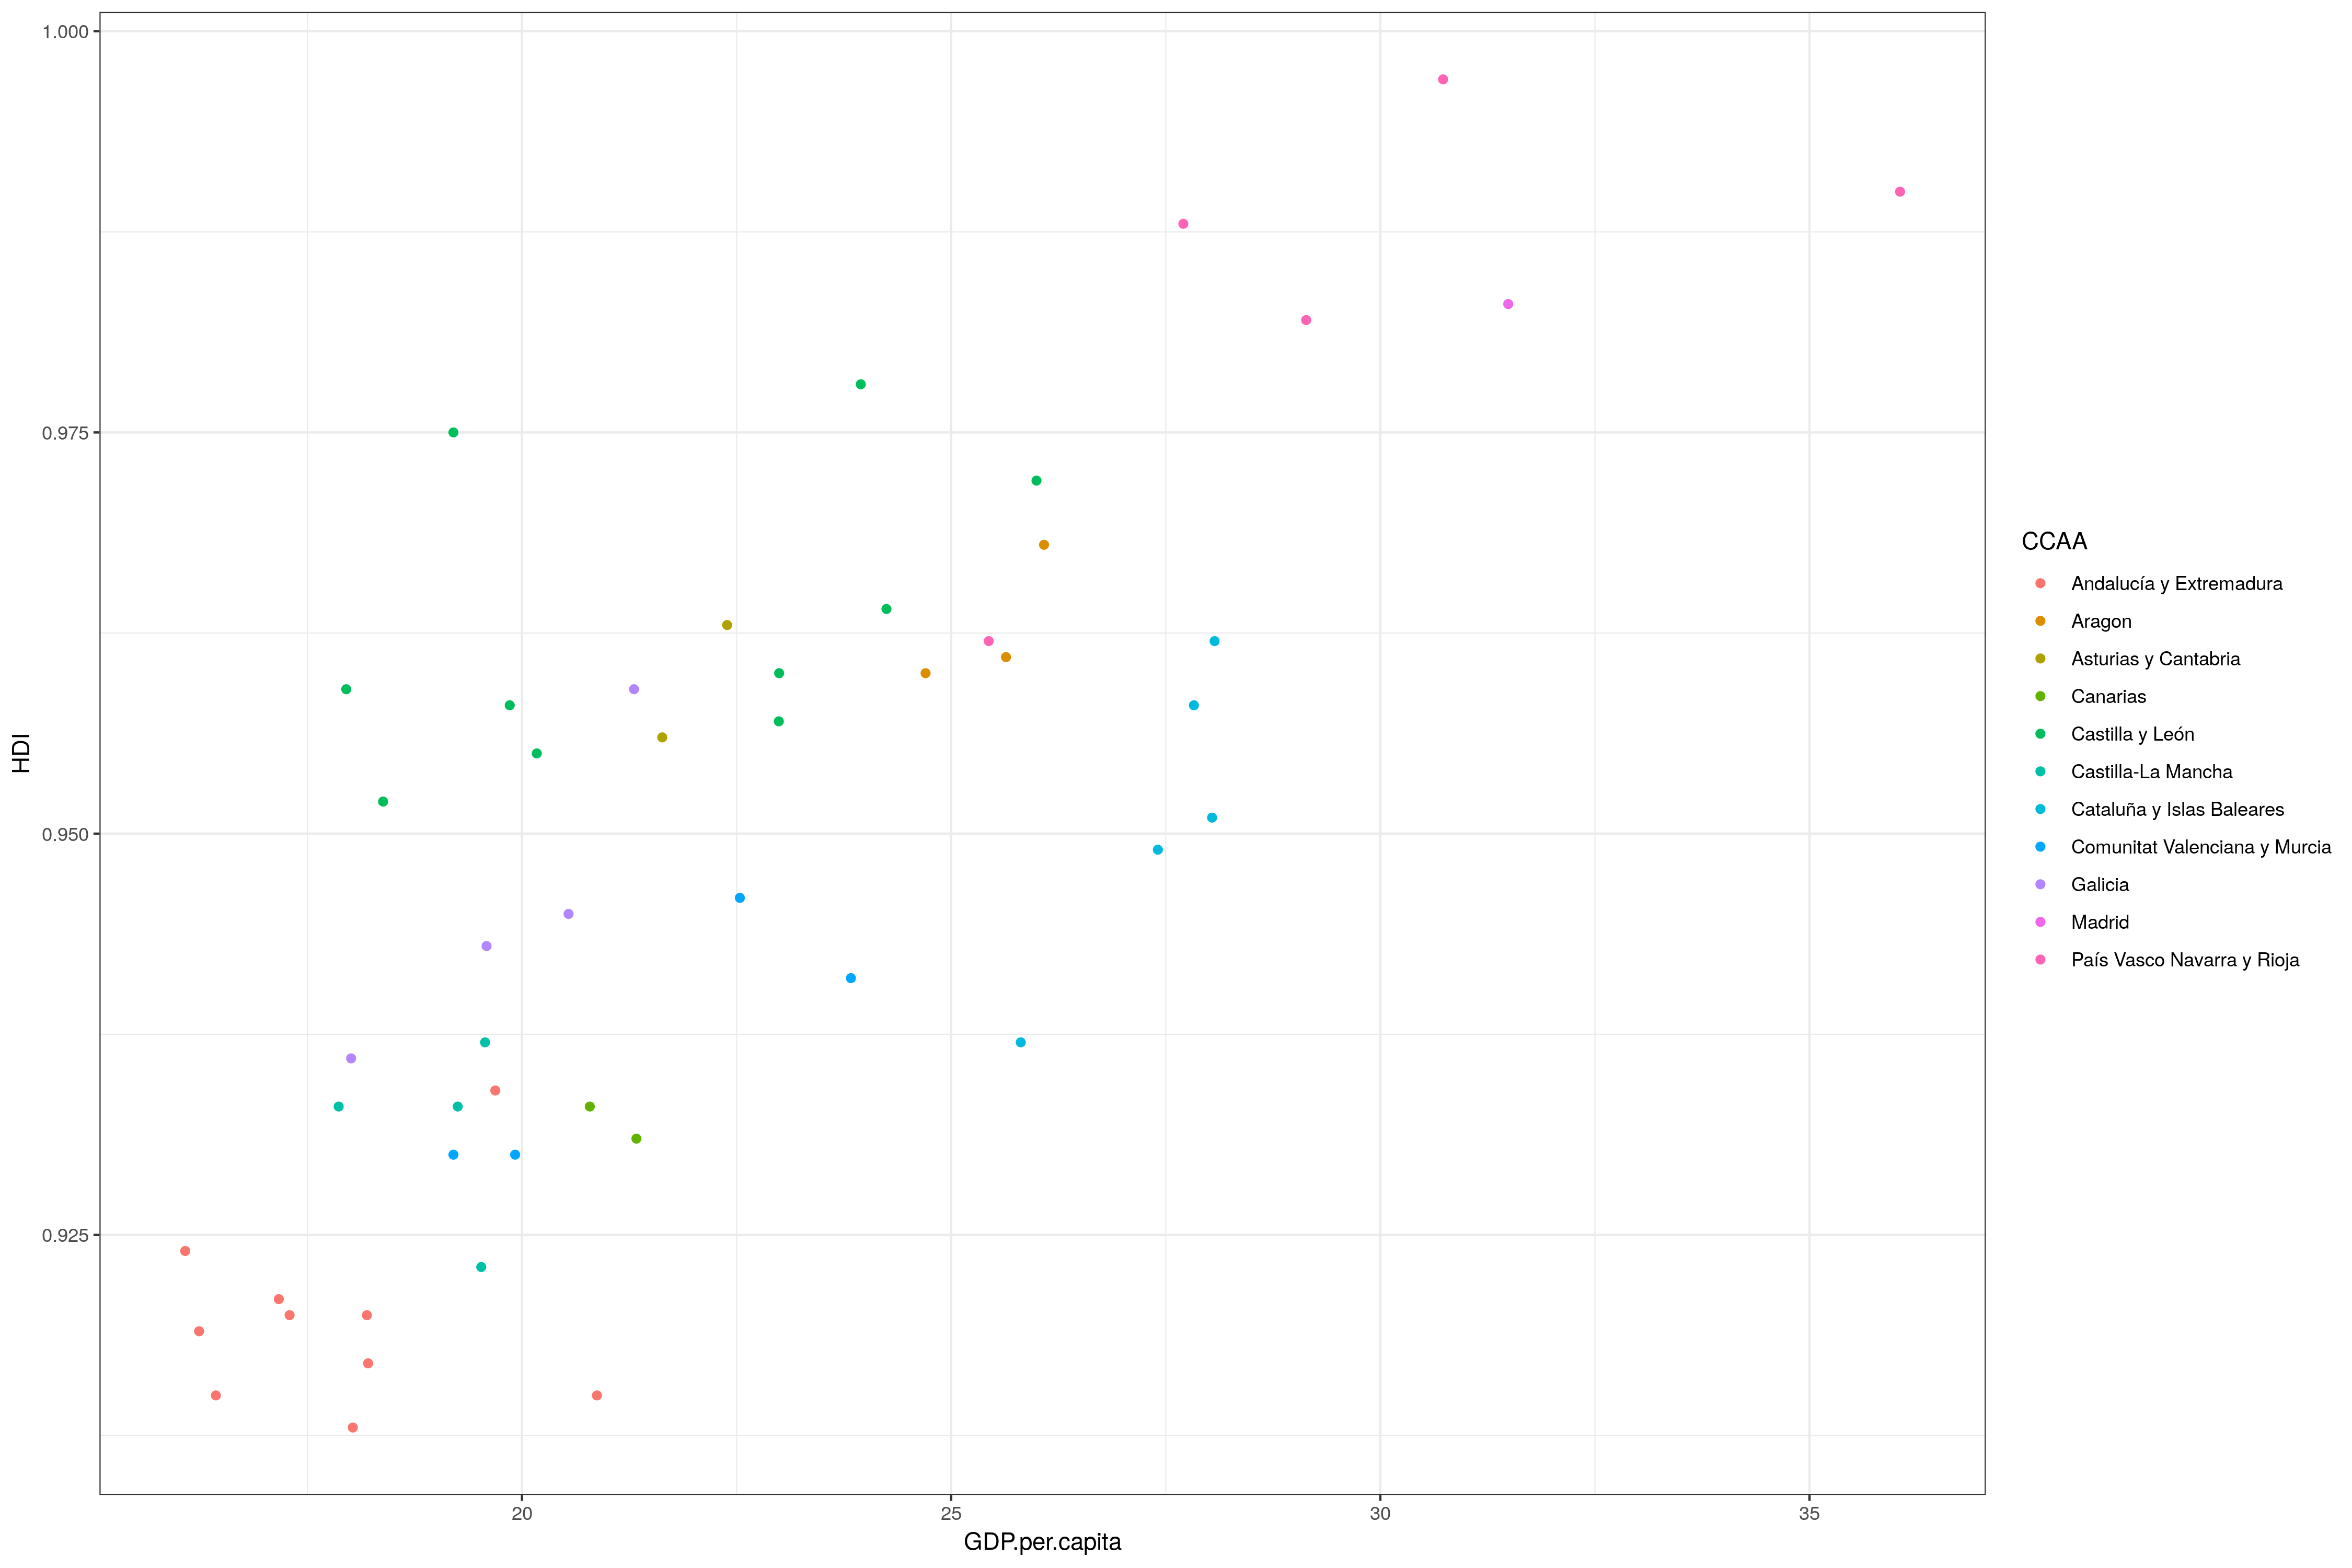

In [11]:
ggplot(binded_data) + geom_point(aes(x = GDP.per.capita, y = HDI, color=CCAA))

- Add over this plot another scatterplot using the new data frame (specify data=...), plotting the mean GDP against the mean HDI by CCAA that you have calculated with aggregate. These points should appear somewhere in the middle of their corresponding provinces. 

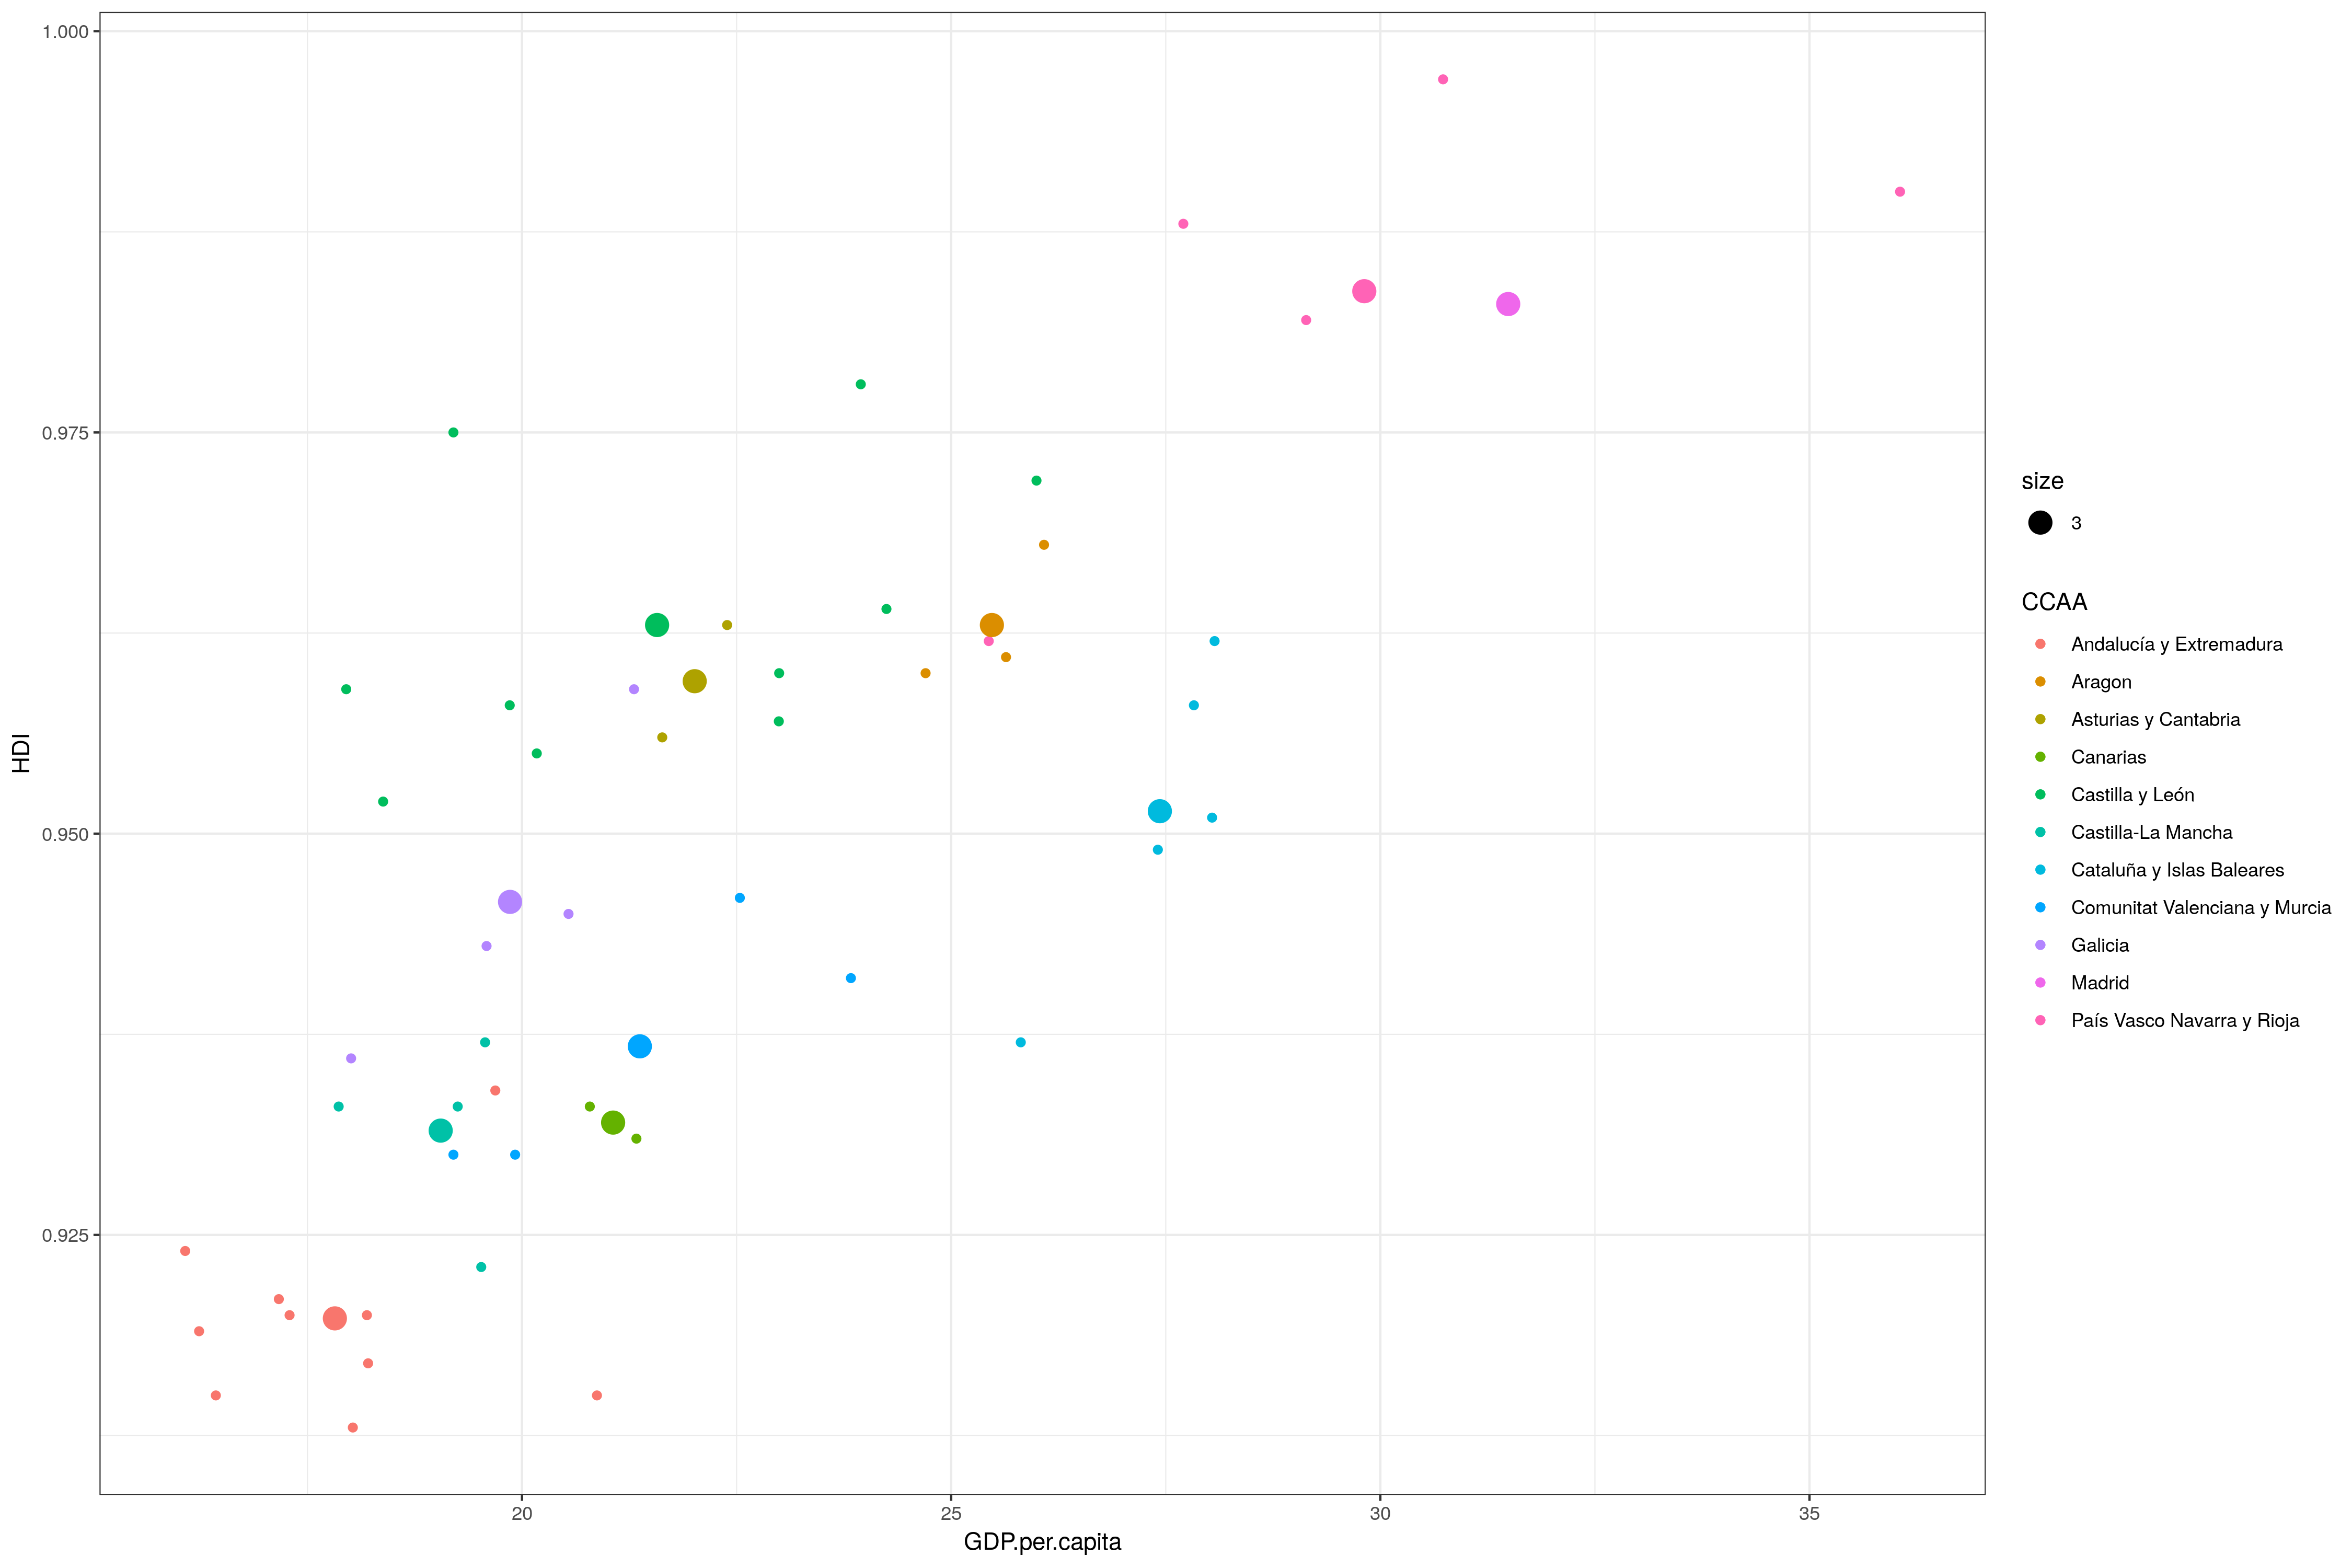

In [12]:
ggplot() + geom_point(data=binded_data, aes(x = GDP.per.capita, y = HDI, color=CCAA)) + 
geom_point(data = CCAA, aes(x = GDP_mean, y = HDI_mean, color=CCAA, size=3)) #increasing the size of GDP vs HDI points to see them clearly

- Add also vertical and horizontal error bars to express the variablity for each CCAA (with geom_errorbar and geom_errorbarh). For geom_errorbar() you have to specify the aestetic paramters x, ymin and ymax. For geom_errorbarh you have to specify the aestetic paramters y, xmin and xmax.

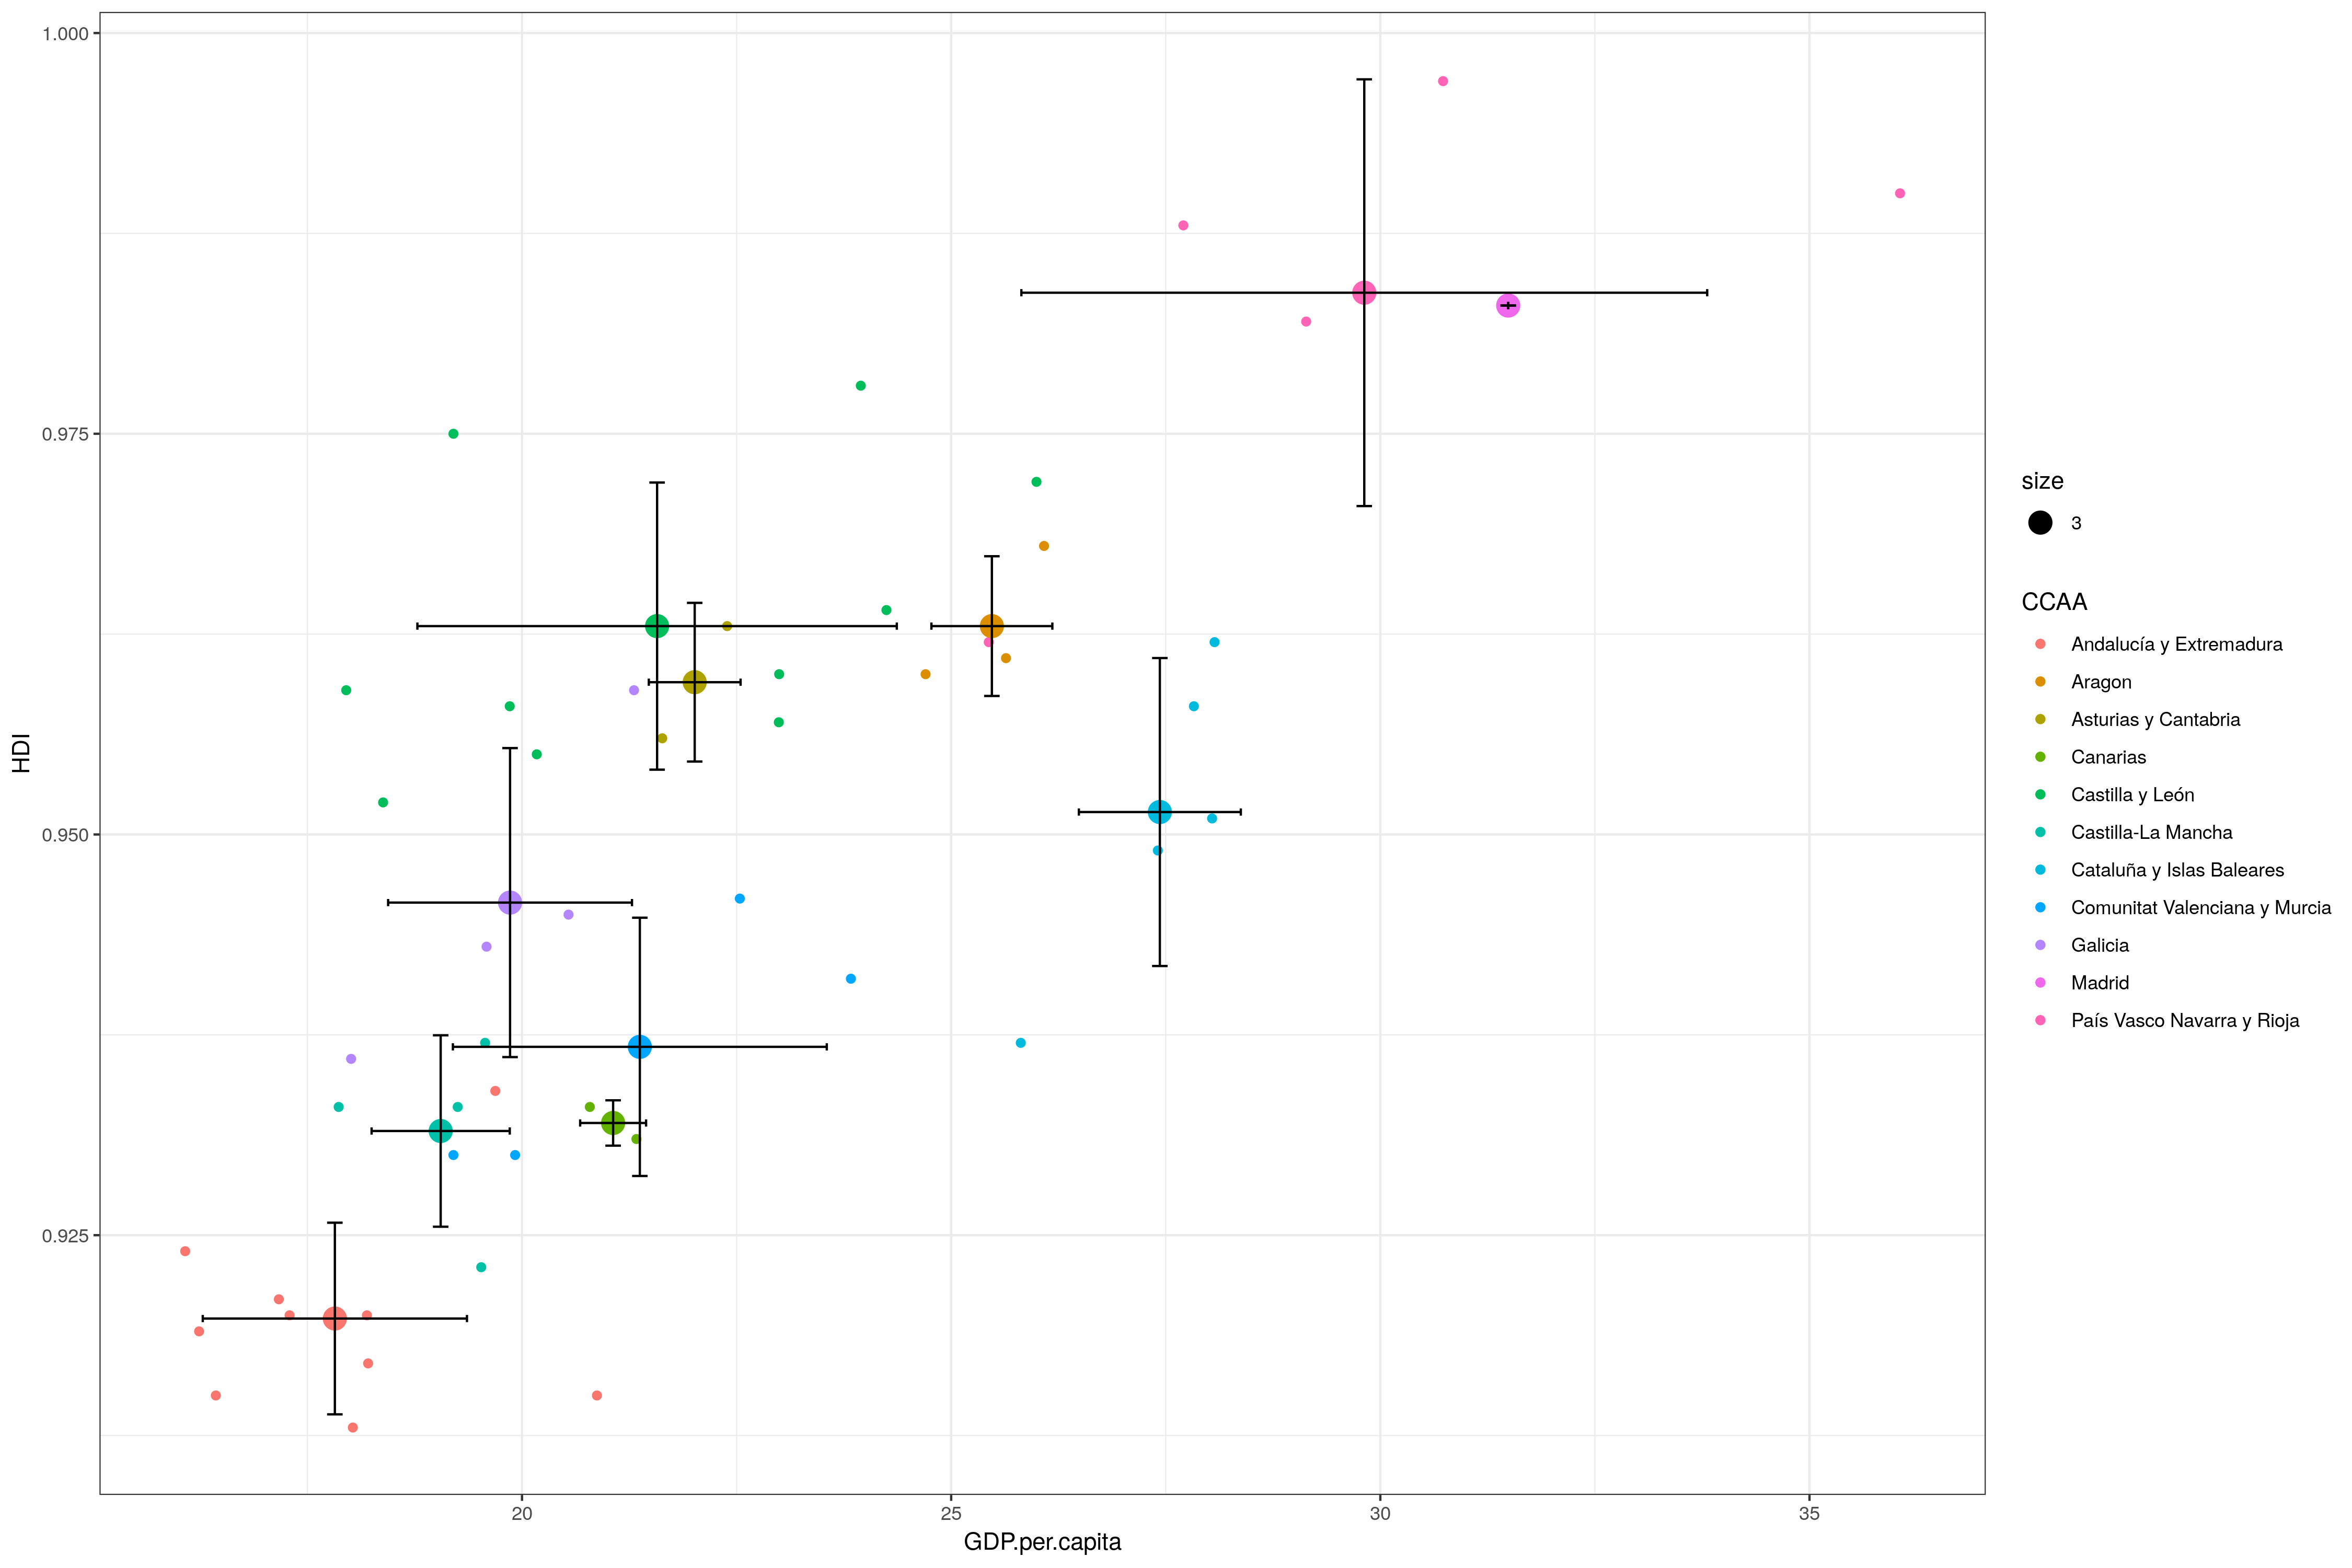

In [13]:
ggplot() + geom_point(data=binded_data, aes(x = GDP.per.capita, y = HDI, color=CCAA)) + 
geom_point(data = CCAA, aes(x = GDP_mean, y = HDI_mean, color=CCAA, size=3)) +
geom_errorbar(data=CCAA, aes(x = GDP_mean, ymin=HDI_mean-HDI_sd, ymax=HDI_mean+HDI_sd)) +
geom_errorbarh(data=CCAA, aes(y = HDI_mean, xmin=GDP_mean-GDP_sd, xmax=GDP_mean+GDP_sd))

- Finally, add the name of each CCAA on the plot with geom_label(). You can add the parameters  hjust=1, vjust=1 to move the labels a little bit so they don't overlap the points.

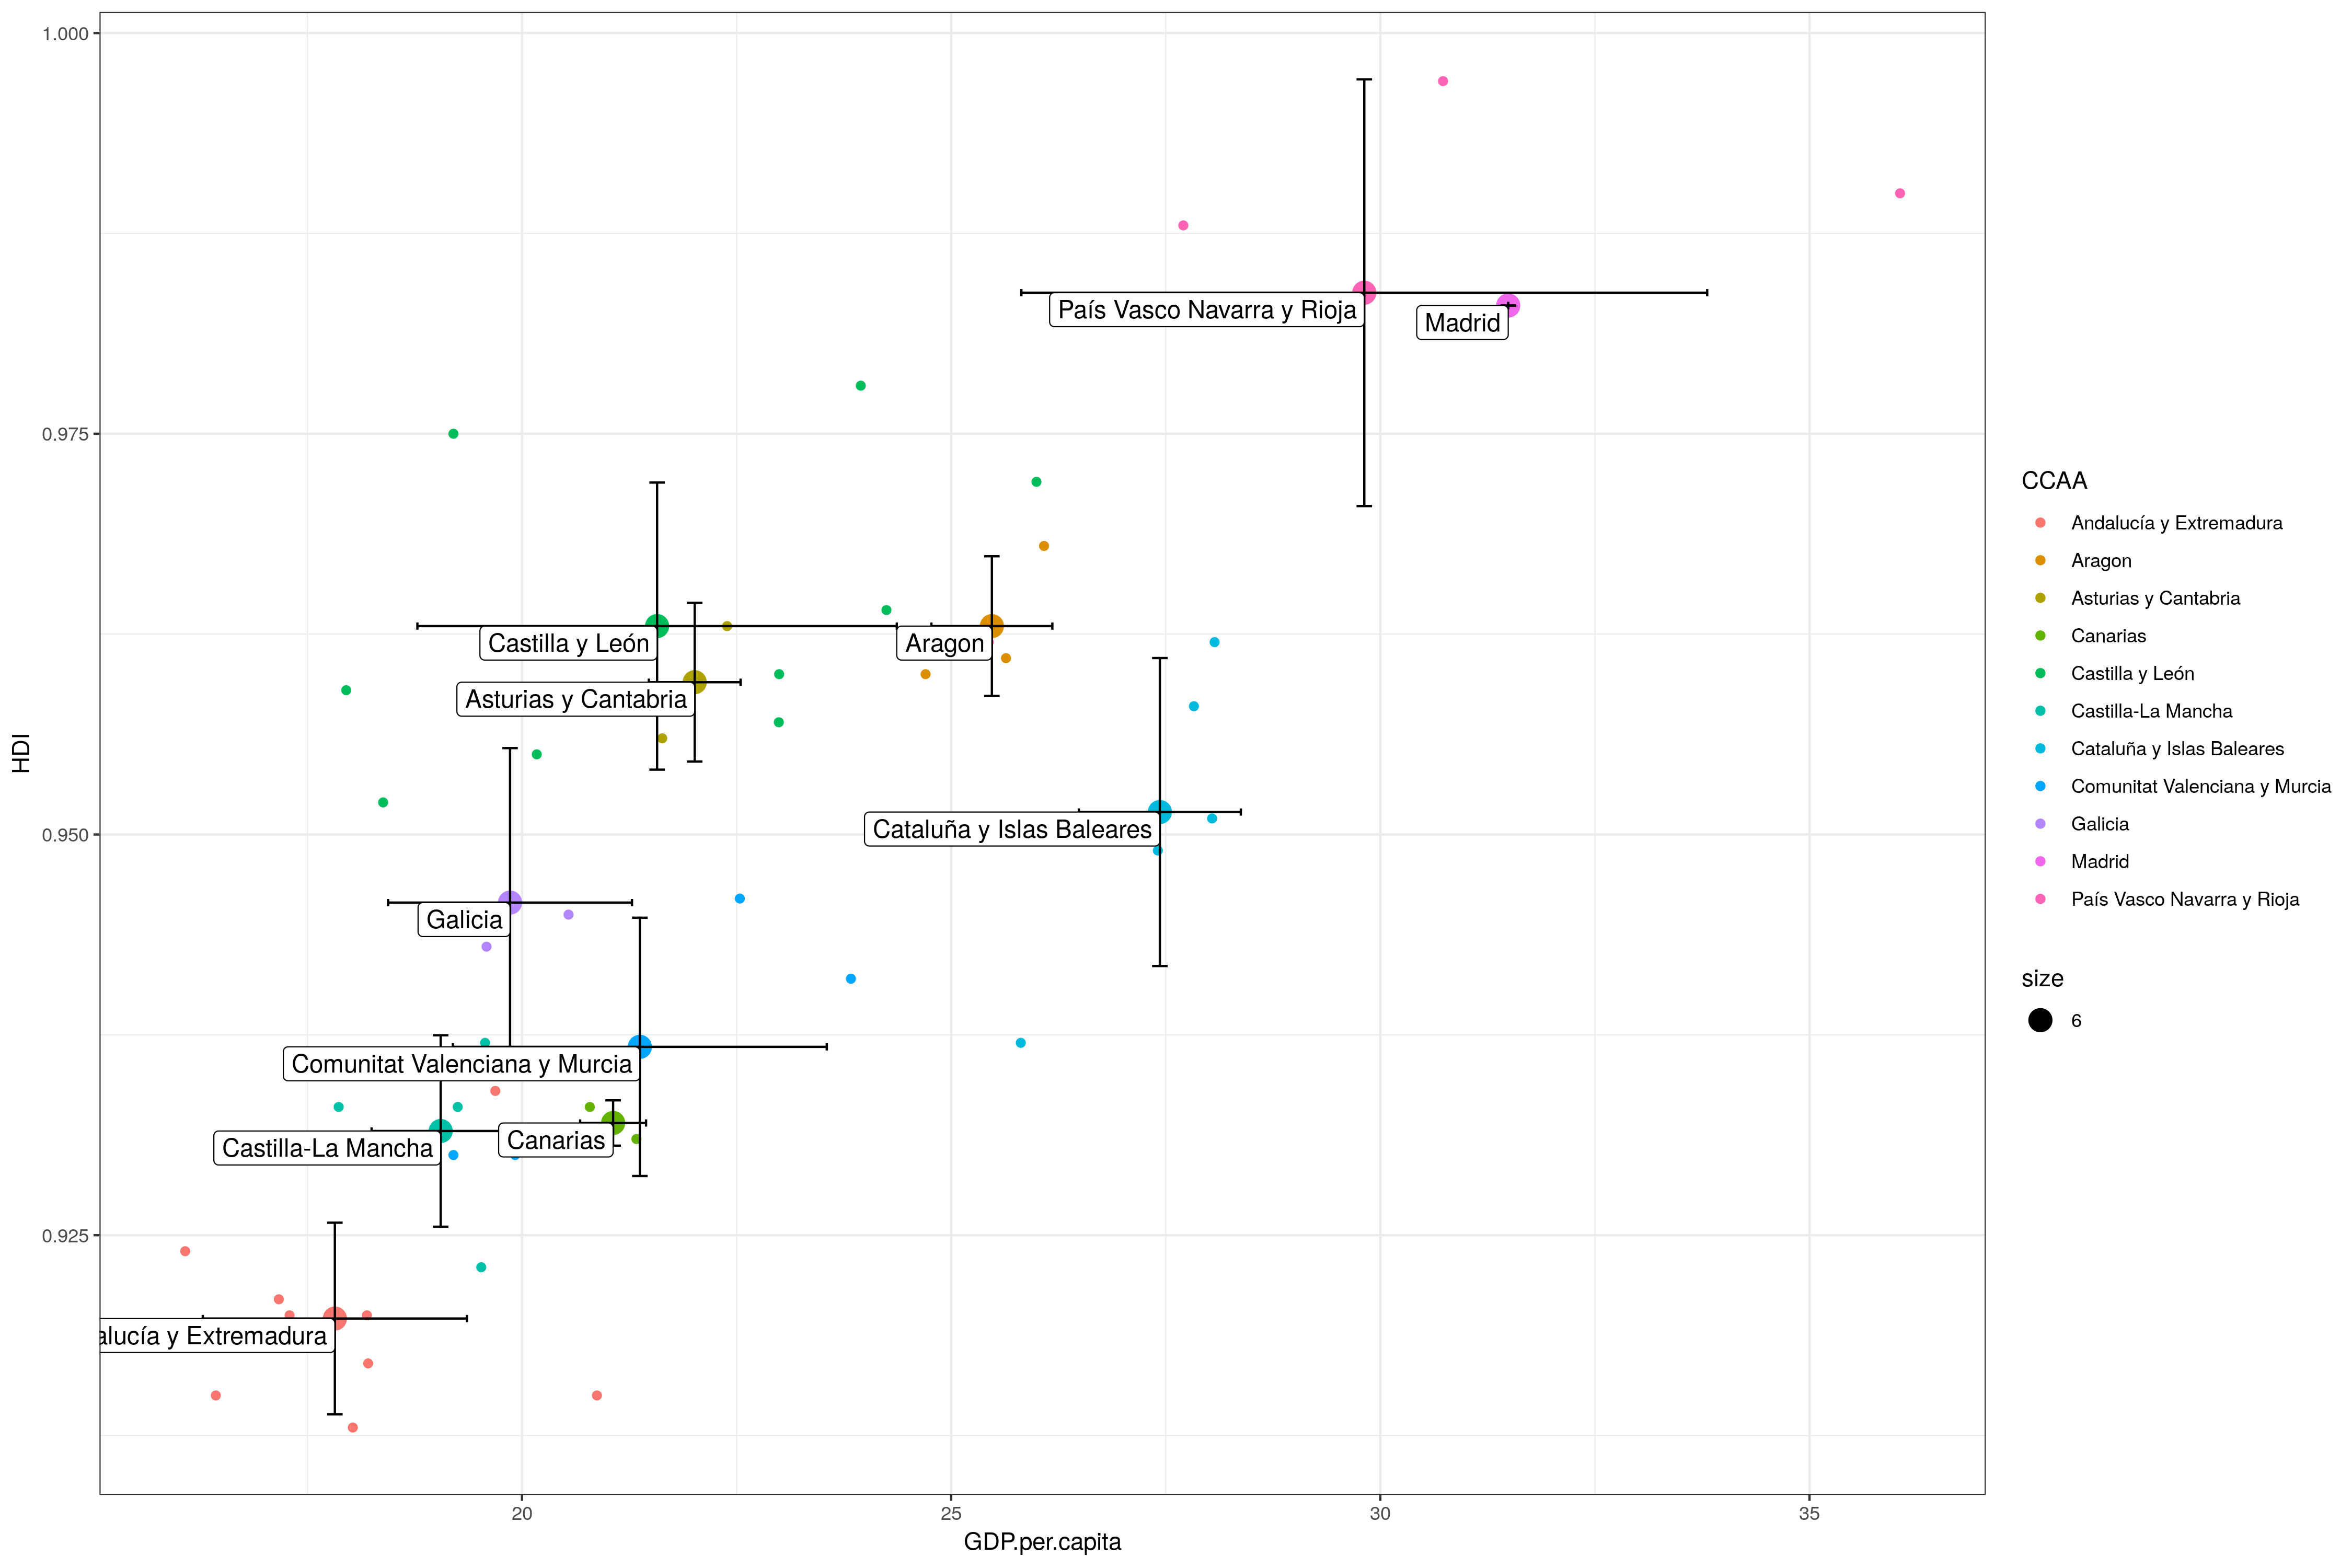

In [14]:
#plotting the data with a better aesthetic
ggplot() + geom_point(data=binded_data, aes(x = GDP.per.capita, y = HDI, color=CCAA)) + 
geom_point(data = CCAA, aes(x = GDP_mean, y = HDI_mean, color=CCAA, size=6)) +
geom_errorbar(data=CCAA, aes(x = GDP_mean, ymin=HDI_mean-HDI_sd, ymax=HDI_mean+HDI_sd)) +
geom_errorbarh(data=CCAA, aes(y = HDI_mean, xmin=GDP_mean-GDP_sd, xmax=GDP_mean+GDP_sd)) +
geom_label(data=CCAA, aes(x = GDP_mean, y = HDI_mean,label=CCAA), size=4, hjust=1, vjust=1)

- *(Optional)* It looks like that GDP is strongly correlated with HDI (the dots follow a straight line). However, you should know that the formula for HDI is (roughly) LifeExpectancy + EducationIndex + GDP.

In [15]:
#correlation between the big points (means of GDP and HDI by CCAA)
with(CCAA, cor(GDP_mean, HDI_mean))

[1] 0.8572833

In [16]:
#correlation between GDP and HDI (small points)
with(binded_data, cor(GDP.per.capita, HDI))

[1] 0.7710093

**Do you think there is something weird? Do you still think that concluding, by simply looking at the chart, that increasing the GDP you can increase the human development of their citizens (or viceversa)? If not, why? Should we maybe compare GDP and HDI in a different way?**

As it is very difficult to measure the well-being of a nation based only on its GDP, the HDI allows countries to be classified based on other variables (including GDP). The combination of these two indicators allows us to analyze the inequality between some nations and others. Specifically, we are comparing CCAA in this exercise, not countries.

Given the nature of the HDI, which includes the GDP itself in its formula (HDI = life expectancy + education index + GDP), the correlation between these two variables is obvious (this can be seen at first sight and r = 0.77). However, there are two other variables at play (i.e., Life Expectancy & Education Index) that can affect this correlation.

Consequently, we should build a multiple regression model in place of a simple linear correlation between 2 variables.